# Part I - (Dataset Exploration Title)
## by (your name here)

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
loans['ListingCreationDate'] = pd.to_datetime(loans.ListingCreationDate)

In [5]:
loans['date'] = loans['ListingCreationDate'].dt.date

In [6]:
loans['time'] = loans['ListingCreationDate'].dt.time


In [7]:
loans = loans.drop(['ListingCreationDate'], axis=1)

In [8]:
loans.head()

,ListingKey,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,date,time
0,1021339766868145413AB3B,193129,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,...,0.0,0.0,0.0,1.0,0,0,0.0,258,2007-08-26,19:09:29.263000
1,10273602499503308B223C1,1209647,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,...,0.0,0.0,0.0,1.0,0,0,0.0,1,2014-02-27,08:28:07.900000
2,0EE9337825851032864889A,81716,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,...,0.0,0.0,0.0,1.0,0,0,0.0,41,2007-01-05,15:00:47.090000
3,0EF5356002482715299901A,658116,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,...,0.0,0.0,0.0,1.0,0,0,0.0,158,2012-10-22,11:02:35.010000
4,0F023589499656230C5E3E2,909464,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,...,0.0,0.0,0.0,1.0,0,0,0.0,20,2013-09-14,18:38:39.097000


In [9]:
loans.IncomeRange

0         $25,000-49,999
1         $50,000-74,999
2          Not displayed
3         $25,000-49,999
4              $100,000+
               ...      
113932    $50,000-74,999
113933    $75,000-99,999
113934    $25,000-49,999
113935    $25,000-49,999
113936    $50,000-74,999
Name: IncomeRange, Length: 113937, dtype: object

In [106]:
loans.duplicated().sum()

0

In [93]:
loans.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

### What is the structure of your dataset?

> The dataset contains 113937 and 80 features rangin from listingkey to investors. Most variables are numeric in nature, but variables Listingkey, loanstatus, CreditGrade etc are order factor variables with the following.

> LoanStatus: completed, Current, Pastdue(1-15days), defaulted, chargedoff, Pastdue(16-30days), Cancelled,Pastdue(31-60days), Pastdue(91-120days), Final payment in Progress, Pastdue(>120days)

> Occupation: Professional, Executive, student -Freshmen, Computer programmer etc

>CreditGrade : C, HR, AA, D, B, E, A, NC




### What is/are the main feature(s) of interest in your dataset?

> My main interest is looking  who are high, medium and average Income earners. And there loans status such as defaulters and current loansholder and their Debt to income ratio to determine whether current loan holders will default.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe the type of creditgrade, borrower is a home owner, occupation, employmnet status, Prosper risk score, current credit lines, loan status, ListingCategory (numeric),Term, income range, stated monthly income, income verifiable will have the strongest indicator on the whether current and past due borrower will rise.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


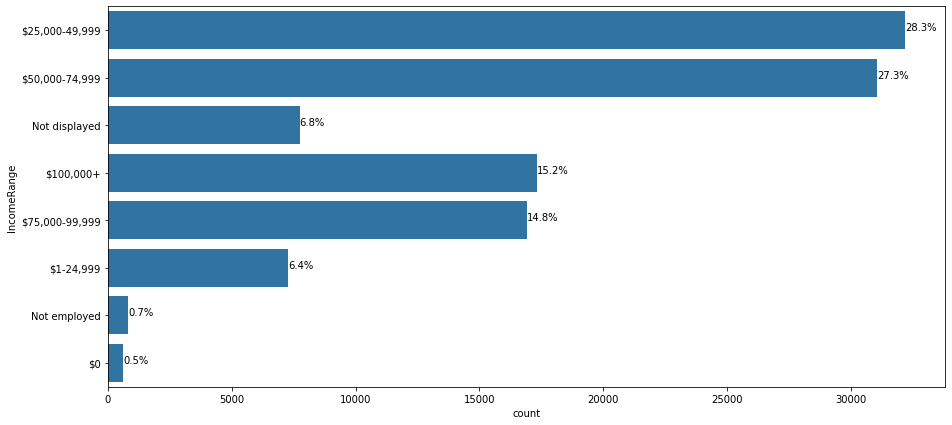

In [8]:
plt.figure(figsize = [15, 7])
default_color = sb.color_palette()[0]
sb.countplot(data = loans, y = 'IncomeRange', color = default_color)

loan_count=loans['IncomeRange'].value_counts()
locs,labels=plt.yticks()
for loc,label in zip(locs,labels):
    count=loan_count[label.get_text()]
    pct_string= "{:0.1f}%".format(100*count/loans.shape[0])
    plt.text(y=loc, x=count, s=pct_string,ha="left",fontsize='medium')

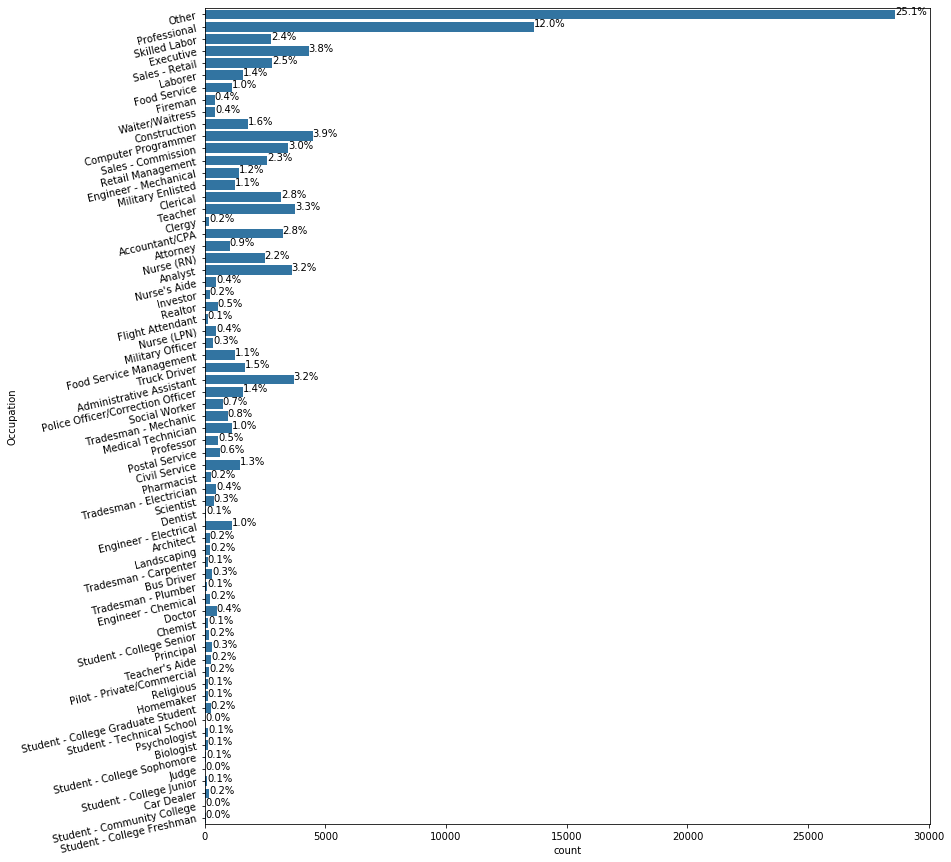

In [22]:
#  An Examination of the Employment of Borrowers by the Prosper lenders
plt.figure(figsize = [13, 15])
default_color = sb.color_palette()[0]
sb.countplot(data = loans, y = 'Occupation', color = default_color)
plt.yticks(rotation=13)

loan_count=loans['Occupation'].value_counts()
locs,labels=plt.yticks()
for loc,label in zip(locs,labels):
    count=loan_count[label.get_text()]
    pct_string= "{:0.1f}%".format(100*count/loans.shape[0])
    plt.text(y=loc, x=count, s=pct_string,ha="left",fontsize='medium')





# plt.xticks(rotation=90)
# plt.show()

In [169]:
 Pdf = loans[loans.Occupation == 'Professional']

In [170]:
Pdf

,ListingKey,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,date,time
1,10273602499503308B223C1,1209647,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,...,0.00,0.00,0.00,1.0,0,0,0.0,1,2014-02-27,08:28:07.900000
5,0F05359734824199381F61D,1074836,NaN,60,Current,NaN,0.15425,0.1314,0.1214,0.11567,...,0.00,0.00,0.00,1.0,0,0,0.0,1,2013-12-14,08:26:37.093000
16,0F4835843081468212F0892,841846,NaN,60,Current,NaN,0.30748,0.2809,0.2709,0.24730,...,0.00,0.00,0.00,1.0,0,0,0.0,8,2013-07-16,12:42:48.680000
17,0FDF336575182398852A8DC,31540,AA,36,Chargedoff,2008-05-22 00:00:00,0.13202,0.1250,0.1175,NaN,...,6012.65,6012.67,268.96,1.0,0,0,0.0,85,2006-08-15,12:21:09.433000
21,1017340630713945364DA6B,241498,D,36,Completed,2010-12-12 00:00:00,0.21488,0.2075,0.1975,NaN,...,0.00,0.00,0.00,1.0,0,0,0.0,53,2007-11-30,20:33:49.227000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113891,E30E3385157595321467881,119186,E,36,Completed,2010-04-20 00:00:00,0.19543,0.1808,0.1708,NaN,...,0.00,0.00,0.00,1.0,0,0,0.0,133,2007-04-04,18:33:17.170000
113906,C982341623647969155E514,300858,AA,36,Completed,2011-04-07 00:00:00,0.07479,0.0680,0.0680,NaN,...,0.00,0.00,0.00,1.0,0,0,0.0,135,2008-03-28,11:38:58.730000
113916,D2063562664602024E13D82,667047,NaN,36,Current,NaN,0.33286,0.2932,0.2832,0.25750,...,0.00,0.00,0.00,1.0,0,0,0.0,87,2012-11-08,20:07:36.600000
113930,E35D3584034795373BCD69A,831523,NaN,36,Current,NaN,0.20053,0.1639,0.1539,0.14520,...,0.00,0.00,0.00,1.0,0,0,0.0,52,2013-07-08,10:24:49.700000


In [167]:
 cdf = loans[loans.Occupation == 'Computer Programmer']

In [168]:
cdf

,ListingKey,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,date,time
14,0F353575943675863D1AFC0,757359,NaN,60,Current,NaN,0.11695,0.0949,0.0849,0.08270,...,0.00,0.00,0.0,0.7731,0,0,0.0,371,2013-04-19,11:17:41.700000
98,0F653600910253363BBD659,1164962,NaN,36,Current,NaN,0.17151,0.1355,0.1255,0.11932,...,0.00,0.00,0.0,1.0000,0,0,0.0,1,2014-01-26,10:13:04.513000
114,10D733970089530836E9A63,190374,C,36,Completed,2009-10-08 00:00:00,0.16727,0.1601,0.1501,NaN,...,0.00,0.00,0.0,1.0000,0,0,0.0,337,2007-08-20,23:17:43.310000
155,10823544952906119C8A3E7,582049,NaN,60,Completed,2013-09-04 00:00:00,0.20705,0.1830,0.1730,0.17000,...,0.00,0.00,0.0,1.0000,0,0,0.0,149,2012-04-24,12:50:16.713000
182,0F553545765264265019C50,580728,NaN,36,Current,NaN,0.25259,0.2148,0.2048,0.20000,...,0.00,0.00,0.0,1.0000,0,0,0.0,24,2012-04-20,13:37:22.147000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113825,CFB1338127898040944BD47,93613,HR,36,Completed,2010-01-13 00:00:00,0.29776,0.2900,0.2650,NaN,...,0.00,0.00,0.0,1.0000,0,0,0.0,28,2007-02-05,11:42:34.790000
113854,DF4135834871108787D28ED,836730,NaN,36,Current,NaN,0.25781,0.2199,0.2099,0.19370,...,0.00,0.00,0.0,1.0000,0,0,0.0,1,2013-07-12,10:44:58.777000
113858,DF5D358022246352110C3B5,796173,NaN,60,Current,NaN,0.18852,0.1649,0.1549,0.14670,...,0.00,0.00,0.0,1.0000,0,0,0.0,35,2013-06-03,16:07:08.090000
113889,E306354526977986481D1E2,581624,NaN,12,Chargedoff,2013-06-27 00:00:00,0.17969,0.1224,0.1124,0.11060,...,1052.99,1082.07,0.0,1.0000,0,0,0.0,42,2012-04-23,13:55:02.287000


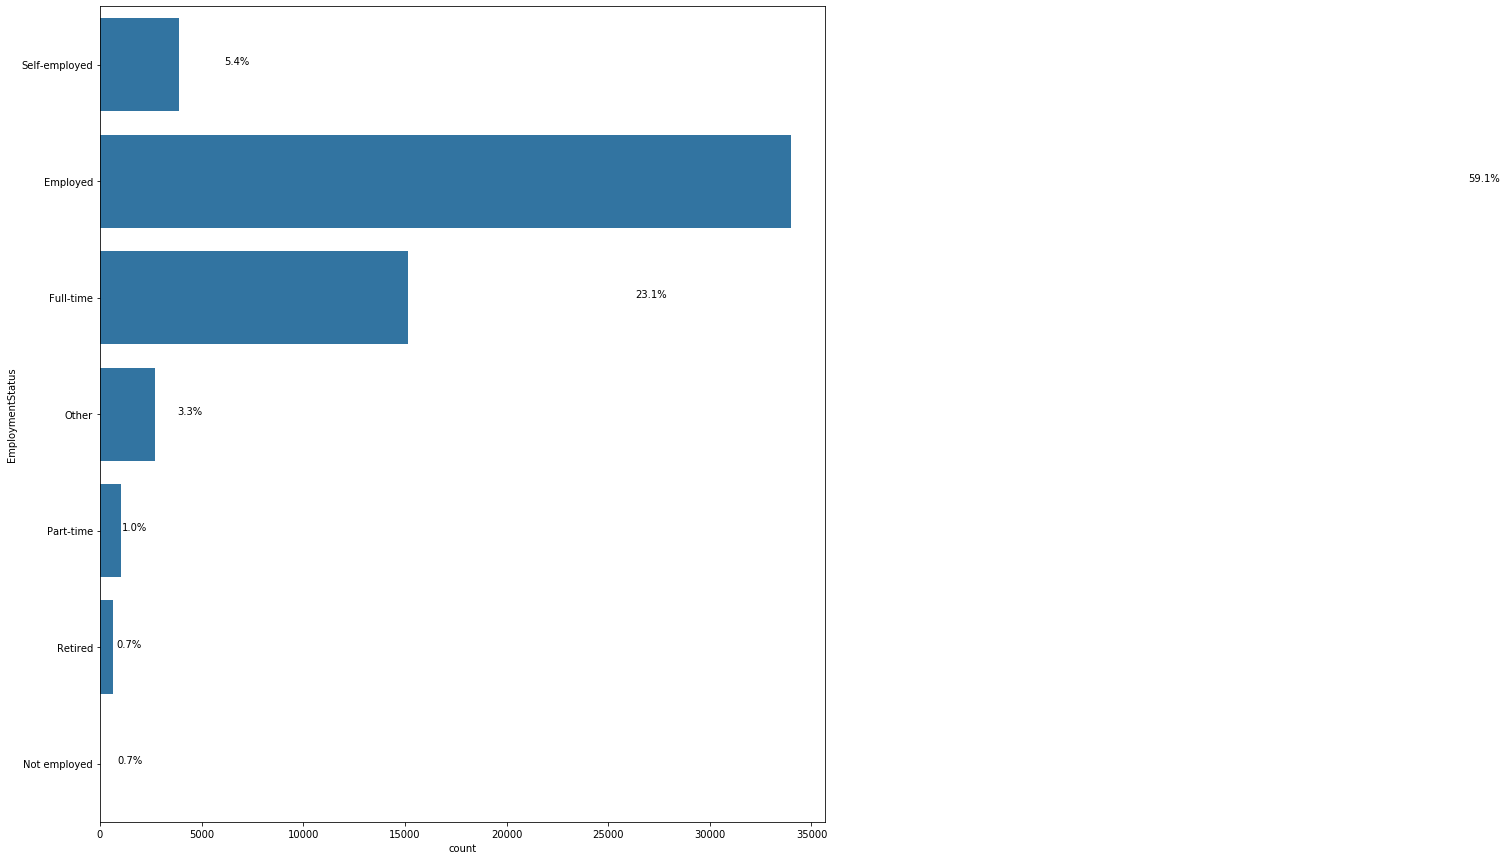

In [26]:
#  An Examination of the Employment of Borrowers by the Prosper lenders
plt.figure(figsize = [13, 15])
default_color = sb.color_palette()[0]
sb.countplot(data = lower_earners, y = 'EmploymentStatus',color = default_color)

loan_count=loans['EmploymentStatus'].value_counts()
locs,labels=plt.yticks()
for loc,label in zip(locs,labels):
    count=loan_count[label.get_text()]
    pct_string= "{:0.1f}%".format(100*count/loans.shape[0])
    plt.text(y=loc, x=count, s=pct_string,ha="left",fontsize='medium')

# plt.xticks(rotation=90)
# plt.show()

In [13]:
loans2=loans.dropna(subset=['CreditScoreRangeLower','CreditScoreRangeUpper'])


In [10]:
loans[['CreditScoreRangeLower', 'CreditScoreRangeUpper']] = loans[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].astype('str')


In [11]:
loans['CreditScore'] = loans[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].agg('-'.join, axis=1)

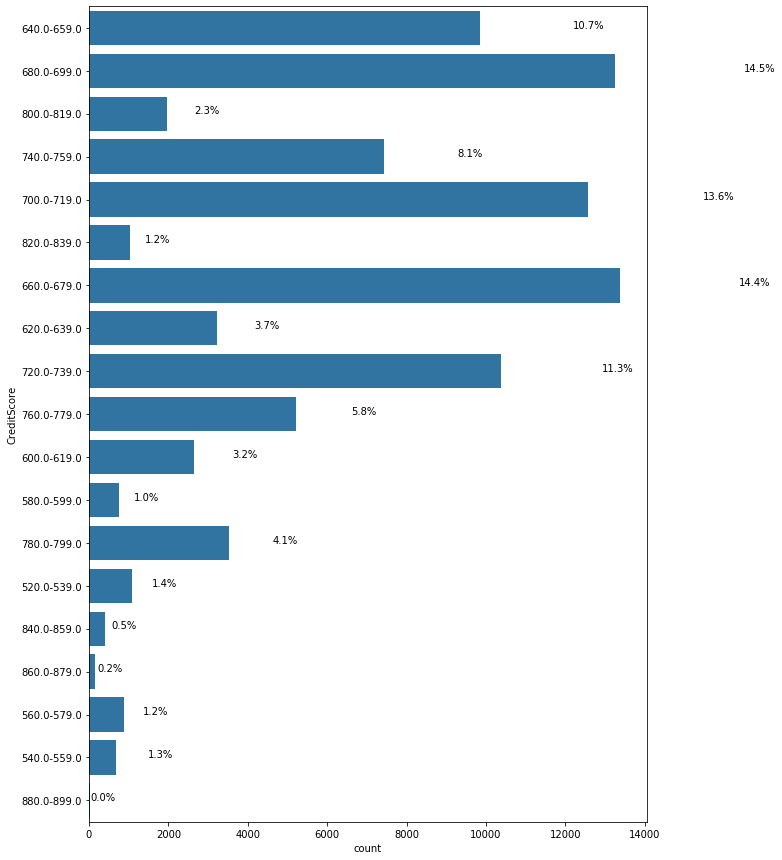

In [22]:
# An examination of credit score of the Average earners.
plt.figure(figsize = [10, 15])

sb.countplot(data = Average_earners, y = 'CreditScore', color = default_color)

loan_count=loans['CreditScore'].value_counts()
locs,labels=plt.yticks()
for loc,label in zip(locs,labels):
    count=loan_count[label.get_text()]
    pct_string= "{:0.1f}%".format(100*count/loans.shape[0])
    plt.text(y=loc, x=count, s=pct_string,ha="left",fontsize='medium')
# plt.xticks(rotation=90)
# plt.show()


In [16]:
# Lets explore the highest earners among the borrowers.
high_earner = loans[loans.IncomeRange > '$100,000+']


In [17]:
medium_earners = loans[loans.IncomeRange <= '$75,000-99,999']

In [18]:
Average_earners = loans[loans.IncomeRange <= '$50,000-74,999']

In [19]:
lower_earners = loans[loans.IncomeRange <= '$25,000-49,999']

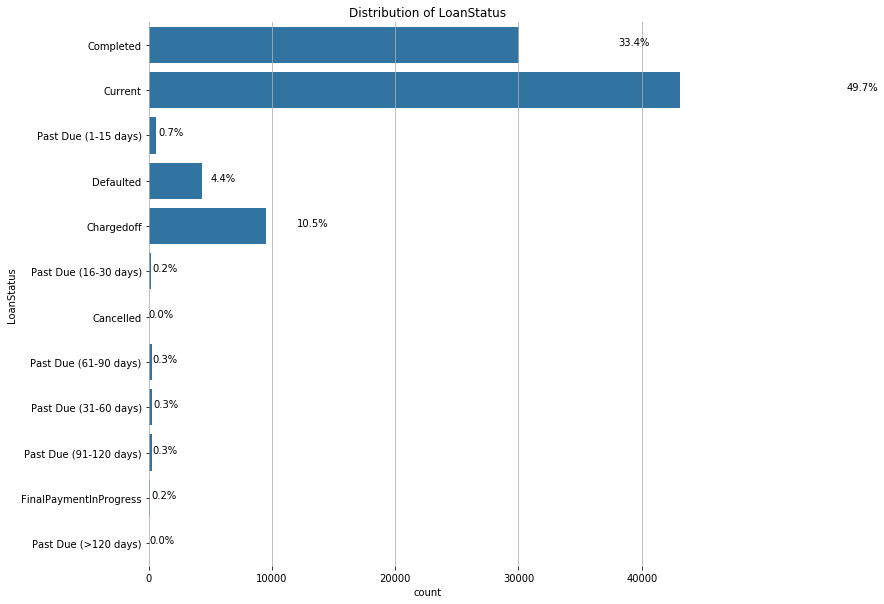

In [20]:
# A examination if the current loanstatus of higher earners categorized by the lenders.
plt.figure(figsize = [10, 10])
default_color = sb.color_palette()[0]
sb.countplot(data = high_earner, y = 'LoanStatus', color = default_color)
sb.despine(bottom=True, left=True)
plt.grid(axis='x')
plt.title('Distribution of LoanStatus');
# plt.xticks(rotation=90)
# plt.show()

loan_count=loans['LoanStatus'].value_counts()
locs,labels=plt.yticks()
for loc,label in zip(locs,labels):
    count=loan_count[label.get_text()]
    pct_string= "{:0.1f}%".format(100*count/loans.shape[0])
    plt.text(y=loc, x=count, s=pct_string,ha="left",fontsize='medium')

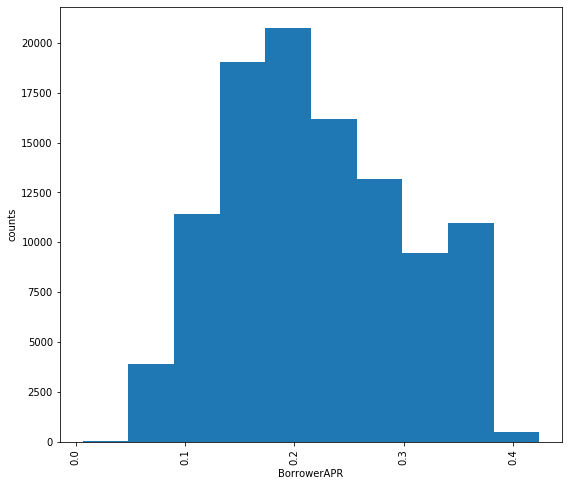

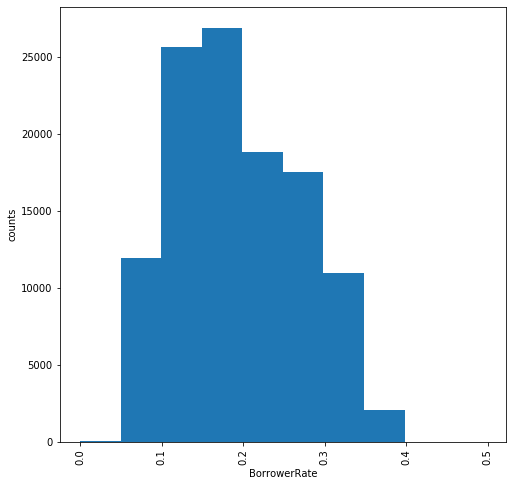

In [44]:
# An examination of whether the APR of medium earners.
plt.figure(figsize = [9, 8])
plt.hist(data = medium_earners, x = 'BorrowerAPR', color = default_color)
plt.xticks(rotation=90)
plt.xlabel('BorrowerAPR')
plt.ylabel('counts')
plt.show()

plt.figure(figsize = [8, 8])
loans['BorrowerRate'].plot(kind='hist')
plt.xticks(rotation=90)
plt.xlabel('BorrowerRate')
plt.ylabel('counts')
plt.show()





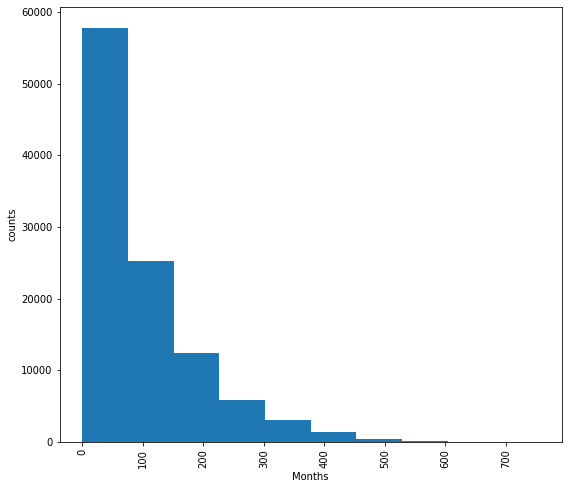

In [28]:
default_color = sb.color_palette()[0]
plt.figure(figsize = [9, 8])
plt.hist(data = loans, x = 'EmploymentStatusDuration', color = default_color)
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('counts')
plt.show()




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

##### Interest was place on the terms of the loans such as the months, employment satus of borrowers as well as loan status and Occupation of the Borrowers, BorrowersAPR's and Rate and  also the income ranges listed (High, Medium and Average).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

#### There were unusual distribution of student who earner over $50,000.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [32]:
# Lets explore the highest earners among the borrowers.
high_earner = loans[loans.IncomeRange > '$100,000+']


In [33]:
medium_earners = loans[loans.IncomeRange <= '$75,000-99,999']

In [ ]:
Average_earners = loans[loans.IncomeRange <= '$50,000-74,999']

In [ ]:
lower_earners = loans[loans.IncomeRange <= '$25,000-49,999']

In [191]:
high_earner.EmploymentStatusDuration             

0           2.0
1          44.0
2           NaN
3         113.0
6         172.0
          ...  
113932    246.0
113933     21.0
113934     84.0
113935     94.0
113936    244.0
Name: EmploymentStatusDuration, Length: 88705, dtype: float64

In [109]:
loans.EmploymentStatusDuration                               

0           2.0
1          44.0
2           NaN
3         113.0
4          44.0
          ...  
113932    246.0
113933     21.0
113934     84.0
113935     94.0
113936    244.0
Name: EmploymentStatusDuration, Length: 113937, dtype: float64

In [17]:
ordinal_var_dict = {'LoanStatus': ['Completed','Current','Past Due(1-15days)','Defaulted','Chargedoff', 'Past Due(16-30 days)','cancelled', 'Past Due(31-60days)', 'Past Due(61-90 days)', 'Past Due(91-120 days)','FinalPayementinProgress', 'Past Due (>120 days)'],
                    'EmploymentStatus': ['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other', 'Not employed', 'Part-time', 'Ritired'],
                    'CreditGrade': ['C', 'D', 'B', 'AA', 'HR', 'A', 'E', 'NC'],
                   'IncomeRange':['$25,000-49,999', '$50,000-74,999', '$75,000-99,999','$100,000+','Not displayed','Not employed']
}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        loans[var] = loans[var].astype(ordered_var)
    else: # pre-v0.21
        loans[var] = loans[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

Text(0, 0.5, 'BorrowerAPR')

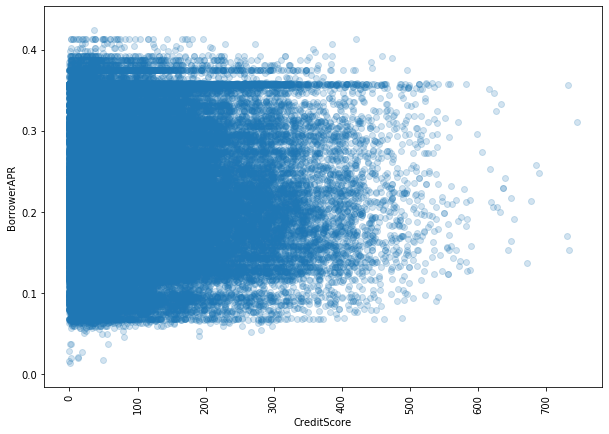

In [51]:
plt.figure(figsize = [10, 7])
plt.scatter(data = high_earner, x = 'EmploymentStatusDuration', y = 'BorrowerAPR', alpha = 0.2);
plt.xticks(rotation=90)
plt.xlabel('CreditScore')
plt.ylabel('BorrowerAPR')


In [48]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 83 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   CreditGrade                          28953 non-null   object 
 3   Term                                 113937 non-null  int64  
 4   LoanStatus                           113937 non-null  object 
 5   ClosedDate                           55089 non-null   object 
 6   BorrowerAPR                          113912 non-null  float64
 7   BorrowerRate                         113937 non-null  float64
 8   LenderYield                          113937 non-null  float64
 9   EstimatedEffectiveYield              84853 non-null   float64
 10  EstimatedLoss                        84853 non-null   float64
 11  EstimatedRetu

(array([-0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]),
 <a list of 7 Text xticklabel objects>)

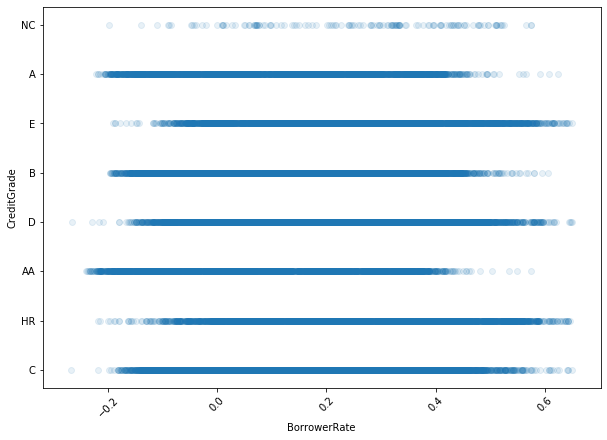

In [41]:
plt.figure(figsize = [10, 7])
# plt.scatter(data = high_earner, x = 'EmploymentStatusDuration', y = 'CreditGrade');
# plt.xticks(rotation=90)
# plt.xlabel('CreditScore')
# plt.ylabel('BorrowerAPR')

# sb.countplot(data = high_earner, x = 'BorrowerRate', hue = 'CreditGrade') 
sb.regplot(data = high_earner, x = 'BorrowerRate', y = 'CreditGrade', x_jitter = 0.3, scatter_kws = {'alpha' : 1/10},  fit_reg = False );

plt.xticks(rotation=45)



(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 7 Text xticklabel objects>)

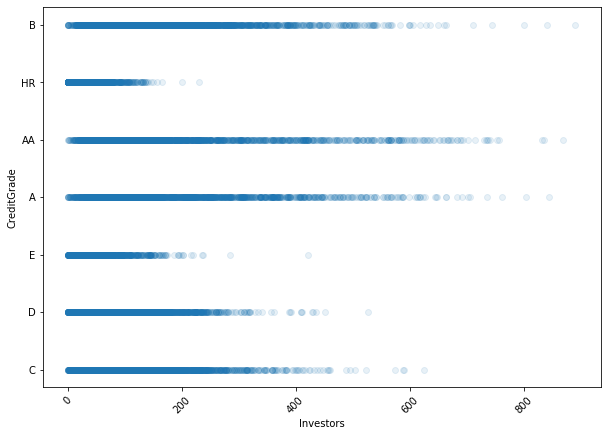

In [42]:
plt.figure(figsize = [10, 7])
# plt.scatter(data = high_earner, x = 'EmploymentStatusDuration', y = 'CreditGrade');
# plt.xticks(rotation=90)
# plt.xlabel('CreditScore')
# plt.ylabel('BorrowerAPR')

# sb.countplot(data = high_earner, x = 'BorrowerRate', hue = 'CreditGrade') 
sb.regplot(data = lower_earners, x = 'Investors', y = 'CreditGrade', x_jitter = 0.3, scatter_kws = {'alpha' : 1/10},  fit_reg = False );

plt.xticks(rotation=45)



Text(0, 0.5, 'IncomeRange')

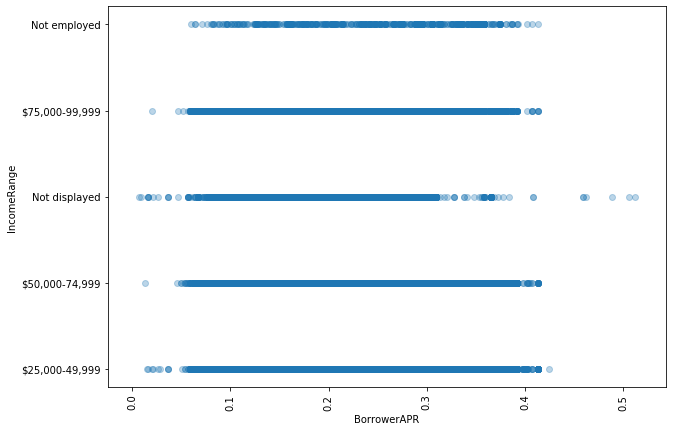

In [52]:
plt.figure(figsize = [10, 7])
plt.scatter(data = high_earner, x = 'BorrowerAPR', y = 'IncomeRange', alpha=0.3);
plt.xticks(rotation=90)
plt.xlabel('BorrowerAPR')
plt.ylabel('IncomeRange')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

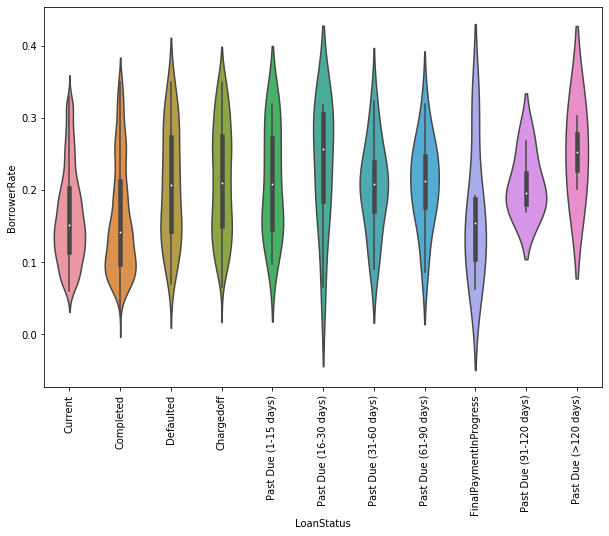

In [182]:
# In following up from the looking at the loan status and the employment status separtely, it important to know how both these varibles interact.
plt.figure(figsize = [10, 7])
sb.violinplot(data=cdf, x='LoanStatus', y='BorrowerRate');
plt.xticks(rotation=90)



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

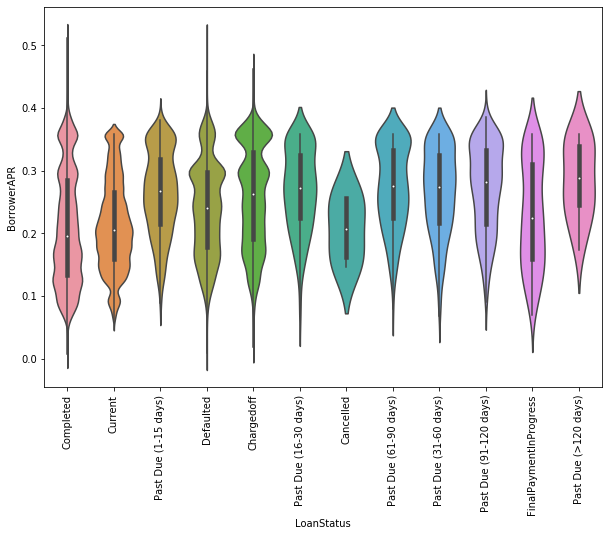

In [42]:
plt.figure(figsize = [10, 7])
sb.violinplot(data=, x='LoanStatus', y='BorrowerAPR');
plt.xticks(rotation=90)

In [ ]:
plt.figure(figsize = [15, 15])
g = sb.FacetGrid(data = high_earner, col = 'StatedMonthlyIncome')
g.map(plt.hist, "Term")

In [66]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 83 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   CreditGrade                          28953 non-null   object 
 3   Term                                 113937 non-null  int64  
 4   LoanStatus                           113937 non-null  object 
 5   ClosedDate                           55089 non-null   object 
 6   BorrowerAPR                          113912 non-null  float64
 7   BorrowerRate                         113937 non-null  float64
 8   LenderYield                          113937 non-null  float64
 9   EstimatedEffectiveYield              84853 non-null   float64
 10  EstimatedLoss                        84853 non-null   float64
 11  EstimatedRetu

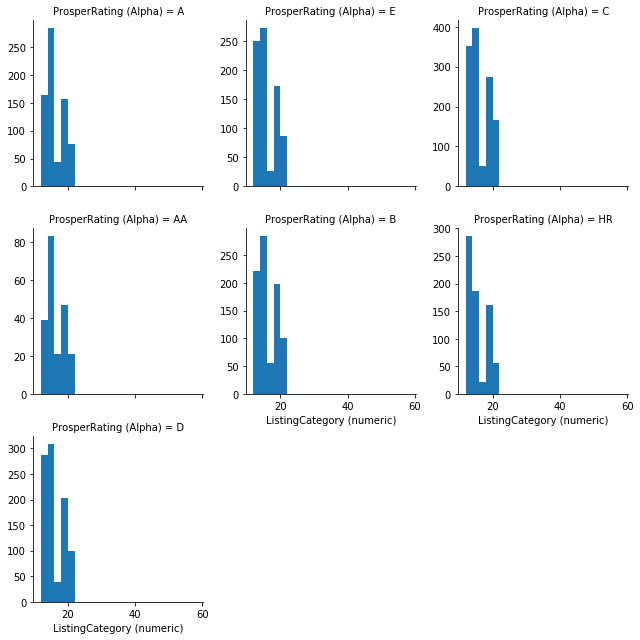

In [189]:
bin_edges = np.arange(12, 58+2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sb.FacetGrid(data = high_earner, col = 'ProsperRating (Alpha)', col_wrap=3, sharey=False)
g.map(plt.hist, 'ListingCategory (numeric)', bins = bin_edges);

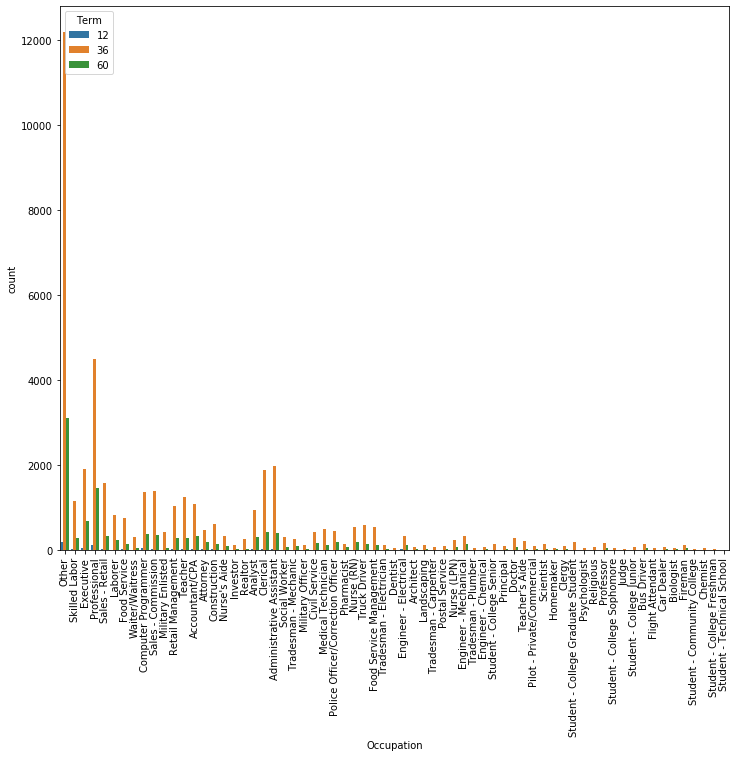

In [18]:
# Also given that it borrower has a differnt income range how does this affect their ability to completed or default on there loans.
plt.figure(figsize = [12, 10])
sb.countplot(data = average_earner, x = 'Occupation', hue = 'Term' ) 
plt.xticks(rotation=90)
plt.show()

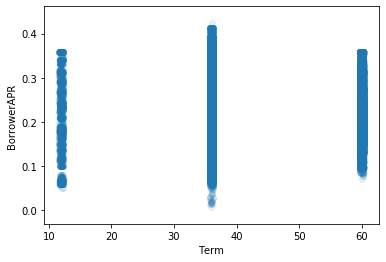

In [23]:
sb.regplot(data = medium_earners, x = 'Term', y = 'BorrowerAPR', x_jitter = 0.3, scatter_kws = {'alpha' : 1/10},  fit_reg = False );

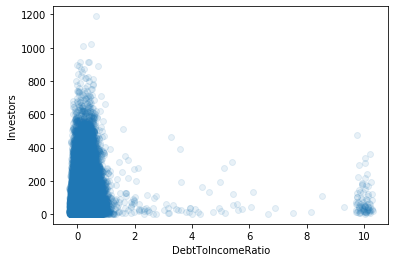

In [275]:
# How does the debt to income affect investors investment on loans
sb.regplot(data = high_earner, x = 'DebtToIncomeRatio', y = 'Investors', x_jitter = 0.3, scatter_kws = {'alpha' : 1/10},  fit_reg = False );
# plt.xlabel('Carat ')
# plt.ylabel('price ($) ');

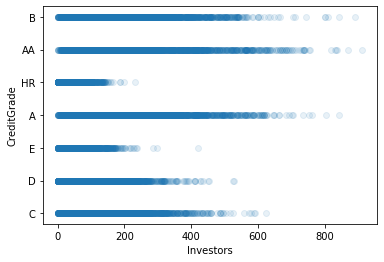

In [47]:
# How does the credit grade affect investors
sb.regplot(data = Average_earners, x = 'Investors', y = 'CreditGrade', x_jitter = 0.3, scatter_kws = {'alpha' : 1/10},  fit_reg = False );
# plt.xlabel('Carat ')
# plt.ylabel('price ($) ');

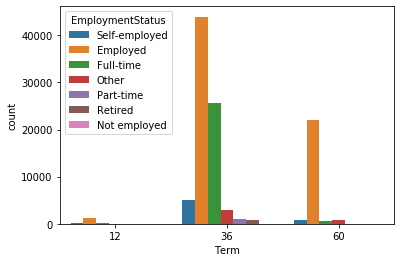

In [277]:
# Does the Employment status and level of employment affect the length of the loan taken by borrowers.
sb.countplot(data = medium_earners, x = 'Term', hue = '') 
plt.show()

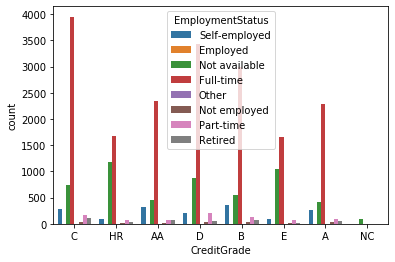

In [80]:
# Does the 
sb.countplot(data = loans, x = 'CreditGrade', hue = 'EmploymentStatus') 


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

##### The relationship between employment status and loan status shows that more employed and full time employees have more current and completed that defaulted loans.
  
##### full time and employed borrower take short terms (36 months) as opposed to those who that take longer term loans (60 months)

##### More investor buy loans with AA and A, B, C  & D credit grades due to the high completed loans payements

#####  The lowest Borrower APR is given to those with of less than 36 months and higher than 60 months.

##### Borrowers of 25000 - 49,000 have the highest C credit grade with 100,000 have the AA credit grade.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

<Figure size 864x864 with 0 Axes>

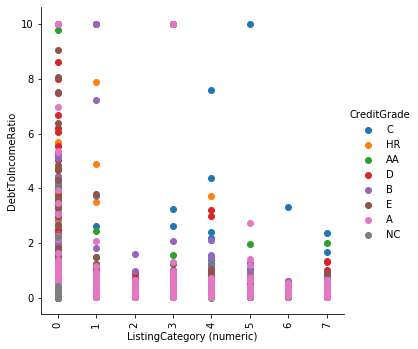

In [84]:
plt.figure(figsize = [12, 12])
g = sb.FacetGrid(data = loans, hue = 'CreditGrade', size = 5)
g.map(plt.scatter, 'ListingCategory (numeric)', 'DebtToIncomeRatio')
plt.xticks(rotation=90)
g.add_legend()

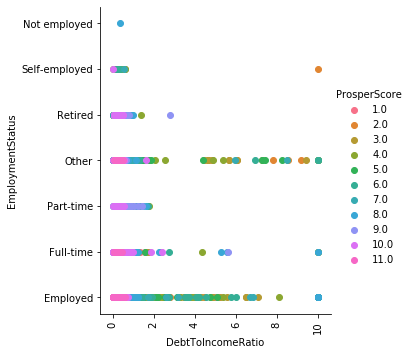

<Figure size 864x864 with 0 Axes>

In [83]:

g = sb.FacetGrid(data = loans, hue = 'ProsperScore', size = 5)
g.map(plt.scatter, 'DebtToIncomeRatio', 'EmploymentStatus')
plt.xticks(rotation=90)
plt.figure(figsize = [12, 12])
g.add_legend()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



In [96]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss